## data cleaning

In [11]:
import pandas as pd
df=pd.read_csv('after.csv')

In [9]:
after=df[df['Datetime']>"2020-03-15"]

NameError: name 'df' is not defined

In [4]:
after.to_csv(r'after.csv', index=False)

NameError: name 'after' is not defined

In [5]:
before=df[df['Datetime']<"2020-03-15"]

NameError: name 'df' is not defined

In [6]:
before.to_csv(r'before.csv')

NameError: name 'before' is not defined

## AFTER covid-19

In [12]:
import pandas as pd
import numpy as np
import re
# Imports
import GetOldTweets3 as got
import pandas as pd

In [13]:
df=pd.read_csv(r'after.csv')
df.shape

(8869, 9)

In [14]:
df.isnull().sum()

Tweet User       0
Text             0
Retweets         0
Favorites        0
Replies          0
Datetime         0
FormattedDate    0
Hashtags         0
Permalink        0
dtype: int64

In [15]:
df['Hashtags']=df.Hashtags.fillna('no_tag')

In [16]:
df['Datetime'].sort_values()

0       2020-03-15 03:15:36+00:00
1       2020-03-15 07:50:32+00:00
2       2020-03-15 13:23:16+00:00
3       2020-03-15 14:05:35+00:00
4       2020-03-15 16:14:06+00:00
                  ...            
8864    2020-08-31 23:34:43+00:00
8865    2020-08-31 23:45:05+00:00
8866    2020-08-31 23:49:02+00:00
8867    2020-08-31 23:57:25+00:00
8868    2020-09-01 17:23:48+00:00
Name: Datetime, Length: 8869, dtype: object

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(stop_words='english', max_df=0.50, min_df=2)
X = vect.fit_transform(df['Text'])

In [18]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
X_dense = X.todense()
coords = PCA(n_components=3).fit_transform(X_dense)

In [19]:
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean')
y_pred = cluster.fit_predict(coords)

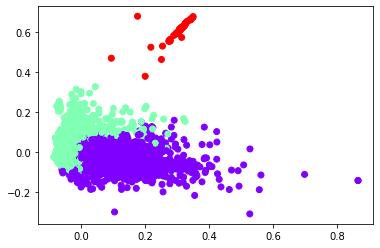

In [20]:
plt.scatter(coords[:,0],coords[:,1], c=cluster.labels_, cmap='rainbow')

In [21]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

mpl.rcParams['figure.figsize']=(16.0,10.0)    
mpl.rcParams['font.size']=12                
mpl.rcParams['savefig.dpi']=1400             
mpl.rcParams['figure.subplot.bottom']=.1 

In [22]:
stopwords = set(STOPWORDS)
l=['work from home', 'workfromhome', 'workingfromhome','workremotely','remote','remotely', 'COVID 19','coronavirus','remotEworking','COVID__19','COVID19','Covid_19','COVID','working home', 'WFH', 'work','home', 'office', 'working', 'remotework']
for i in l:
    stopwords.add(i)

There are 1676206 words in the combination of all tweets.


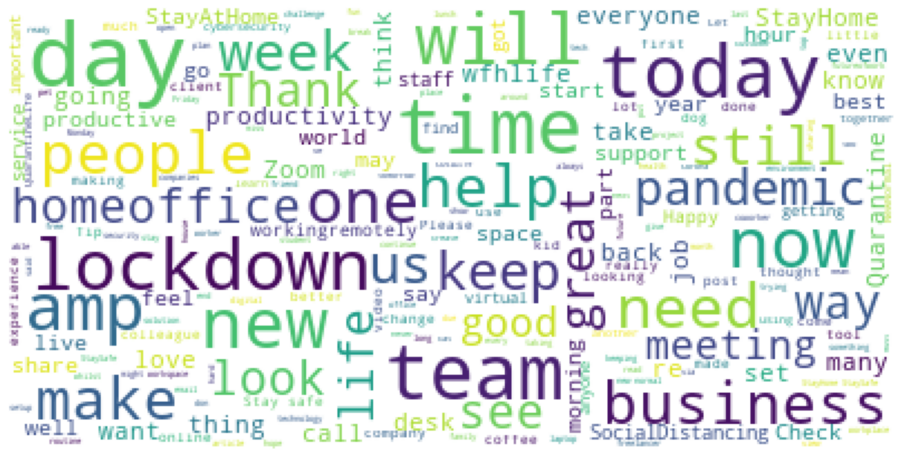

KeyboardInterrupt: 

In [23]:
text = " ".join(tweet for tweet in df.Text)
print ("There are {} words in the combination of all tweets.".format(len(text)))

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(text))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=1400)

# Before COVID19

In [155]:
df2=pd.read_csv('before.csv')

In [156]:
df2.shape

(5647, 10)

In [139]:
df2=df2.drop_duplicates().reset_index(drop=True)
df2.shape

(5647, 10)

In [160]:
df2.isnull().sum()

Unnamed: 0       0
Tweet User       0
Text             0
Retweets         0
Favorites        0
Replies          0
Datetime         0
FormattedDate    0
Hashtags         0
Permalink        0
dtype: int64

In [161]:
mpl.rcParams['figure.figsize']=(16.0,10.0)    
mpl.rcParams['font.size']=12                
mpl.rcParams['savefig.dpi']=1400             
mpl.rcParams['figure.subplot.bottom']=.1 

In [177]:
stopwords = set(STOPWORDS)
l=['work from home', 'workfromhome', 'workingfromhome','remote','remotely', 'COVID 19','coronavirus','remotEworking','COVID__19','COVID19','Covid_19','COVID','working home', 'WFH', 'work','home', 'office', 'working', 'remotework']
for i in l:
    stopwords.add(i)

There are 933317 words in the combination of all tweets.


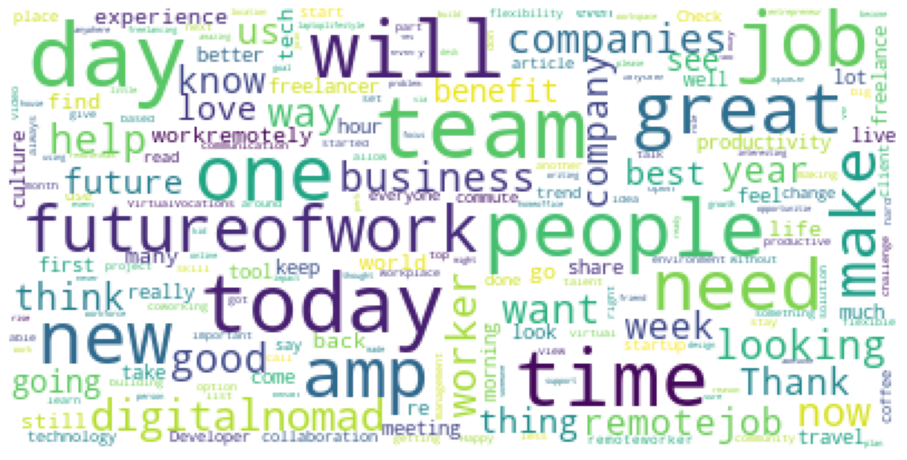

In [178]:

text = " ".join(tweet for tweet in df2.Text)
print ("There are {} words in the combination of all tweets.".format(len(text)))

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(text))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=1400)

# Data from 2019-07-2020-09-01

In [24]:
import pandas as pd
import numpy as np
import re
df=pd.read_csv(r'tweets.csv')

In [25]:
df=df.sort_values(by='Datetime').reset_index(drop=True)

In [26]:
df.shape

(14516, 10)

In [27]:
df=df.drop_duplicates()

In [28]:
lst=['remote', 'hr', 'HR' ,'WFH','job','career' 'work', 'Job', 'remotely', 'covid', 'offer', 'Work','law', 'Trainee', 'employ','market','Manage','web', 'Web', 'covid', 'COVID', 'health', 'coronavirus', 'Team', 'team']
a=[]
for i in df['Tweet User']:
    for j in lst:
        if j in i:
            a.append(i)
df=df[~df['Tweet User'].isin(a)]

In [29]:
df['Text']=df['Text'].drop_duplicates()
df=df.dropna()

In [30]:
lst2=['http', 'tip', 'opportunity', 'hir','career', 'offer','subscribe', 'hr', 'follow', 'survey', 'employ']
b=[]
for i in df['Text']:
    for j in lst2:
        if j in i:
            b.append(i)
df=df[~df['Text'].isin(b)].reset_index(drop=True)
df.shape

(14516, 10)

In [31]:
df.shape

(14516, 10)

## 1. words cloud

In [32]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

mpl.rcParams['figure.figsize']=(16.0,10.0)    
mpl.rcParams['font.size']=12                
mpl.rcParams['savefig.dpi']=1400             
mpl.rcParams['figure.subplot.bottom']=.1 

In [33]:
stopwords = set(STOPWORDS)
l=['work from home', 'workfromhome','remote','remotely', 'workremotely','workingfromhome', 'COVID 19','coronavirus','remotEworking','COVID__19','COVID19','Covid_19','COVID','working home', 'WFH', 'work','home', 'office', 'working', 'remotework']
for i in l:
    stopwords.add(i)

There are 2609524 words in the combination of all tweets.


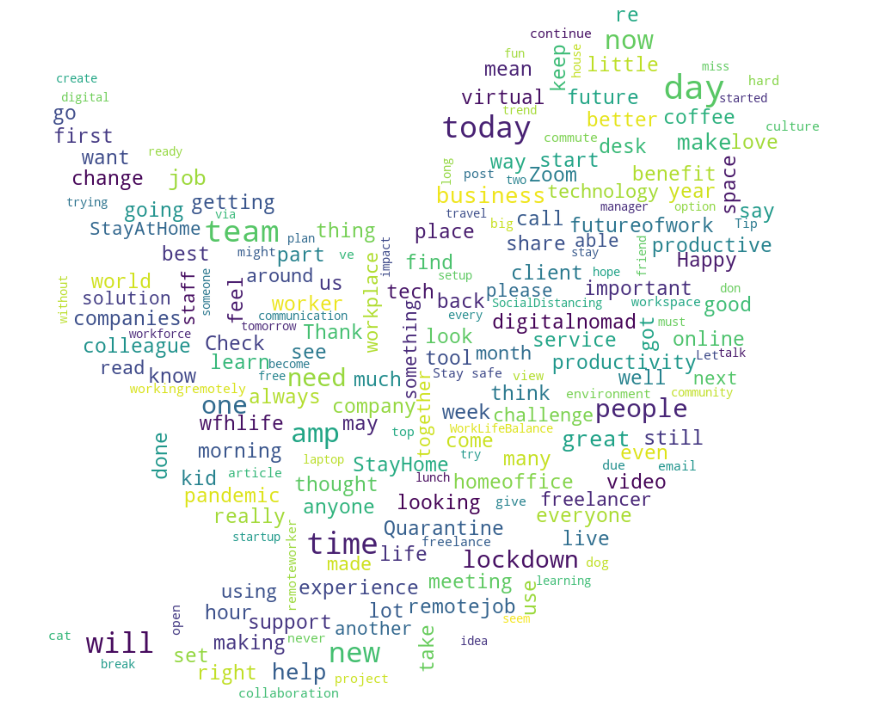

In [42]:
from PIL import Image 
text = " ".join(tweet for tweet in df.Text)
print ("There are {} words in the combination of all tweets.".format(len(text)))

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42,
                          mask = pos_mask
                         ).generate(str(text))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout()
plt.show()
fig.savefig("word1.png", dpi=1400)

In [ ]:
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

## 2.Calculate and Plot Word Frequency

In [59]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [60]:
# Split the words from one tweet into unique elements
text=[x.lower().split() for x in df['Text']]

In [61]:
flat = []
for i in text:
    for j in i:
        flat.append(j)

In [62]:
flat=[i.strip('#@&') for i in flat]

In [63]:
len(flat)

373808

### 2.1 Remove Stopwords With nltk

In [64]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rachel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [65]:
stop_words = set(stopwords.words('english'))
# View a few words from the set

In [66]:
# remove stopwords
text_new= [word for word in flat if word not in stop_words]

In [67]:
len(text_new)

246981

In [101]:
#remove collection words:
collection_words =['work from home','covid_19uk','cowvid19','-','.','remoteworking','wfh','','covid-19','covid','workfromhome','remote','remotely', 'workremotely','workingfromhome', 'covid19','coronavirus','remotEworking','covid_19','COVID19','Covid_19','COVID','working home', 'WFH', 'work','home', 'office', 'working', 'remotework']

In [102]:
text_no_coll= [word for word in text_new if word not in collection_words]

In [72]:
len(text_no_coll)

208565

In [73]:
from collections import Counter
# Create counter
text_count=Counter(text_no_coll).most_common()

In [74]:
len(text_count)

47474

In [75]:
text_df = pd.DataFrame(text_count,columns=['words', 'count'])

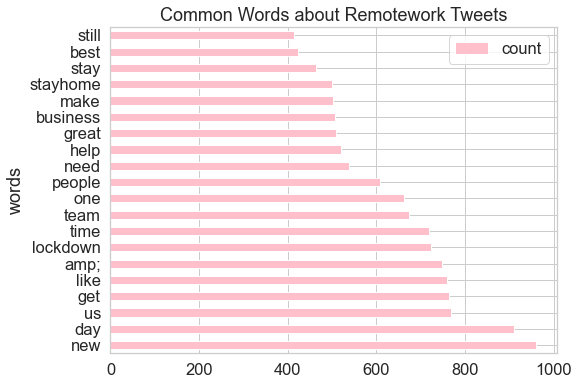

In [76]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot horizontal bar graph
text_df.sort_values(by='count', ascending=False)[:20].plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="pink")
ax.set_title("Common Words about Remotework Tweets")

plt.show()

#  Co-occurring 

In [103]:
#remove collection words:
collection_words =['work from home','covid_19uk','cowvid_19','workingfromhomelife','cowvid19','-','.','remoteworking','wfh','','covid-19','covid','workfromhome','remote','remotely', 'workremotely','workingfromhome', 'covid19','coronavirus','remotEworking','covid_19','COVID19','Covid_19','COVID','working home', 'WFH', 'work','home', 'office', 'working', 'remotework']
text_no_coll= [word for word in text_new if word not in collection_words]

In [104]:
import nltk
from nltk import bigrams
from nltk.corpus import stopwords
import re
import networkx as nx
bigram=list(bigrams(text_no_coll))

In [105]:
len(bigram)

208246

In [106]:
bigram_counts = Counter(bigram)

bigram_counts.most_common(20)

[(('stayhome', 'staysafe'), 86),
 (('stay', 'safe'), 68),
 (('anyone', 'else'), 66),
 (('let', 'us'), 62),
 (('looking', 'forward'), 61),
 (('make', 'sure'), 59),
 (('would', 'like'), 58),
 (('contact', 'us'), 58),
 (('looks', 'like'), 56),
 (('socialdistancing', 'lockdown'), 56),
 (('worldofcow', 'selfisolation'), 53),
 (('selfisolation', 'socialdistancing'), 53),
 (('stayhome', 'worldofcow'), 51),
 (('feel', 'like'), 50),
 (('golang', 'golangjobs'), 47),
 (('quarantine', 'lockdown'), 44),
 (('coronaviruslockdown', 'coronaviruspandemic'), 44),
 (('coronaviruspandemic', 'coronavirusoutbreak'), 44),
 (('new', 'normal'), 42),
 (('go', 'back'), 40)]

In [111]:
bigram_df = pd.DataFrame(bigram_counts.most_common(30),
                             columns=['bigram', 'count'])

bigram_df

,bigram,count
0,"(stayhome, staysafe)",86
1,"(stay, safe)",68
2,"(anyone, else)",66
3,"(let, us)",62
4,"(looking, forward)",61
5,"(make, sure)",59
6,"(would, like)",58
7,"(contact, us)",58
8,"(looks, like)",56
9,"(socialdistancing, lockdown)",56


## Visualize Networks of Bigrams

In [112]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')

In [113]:
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

G.add_node("china", weight=100)

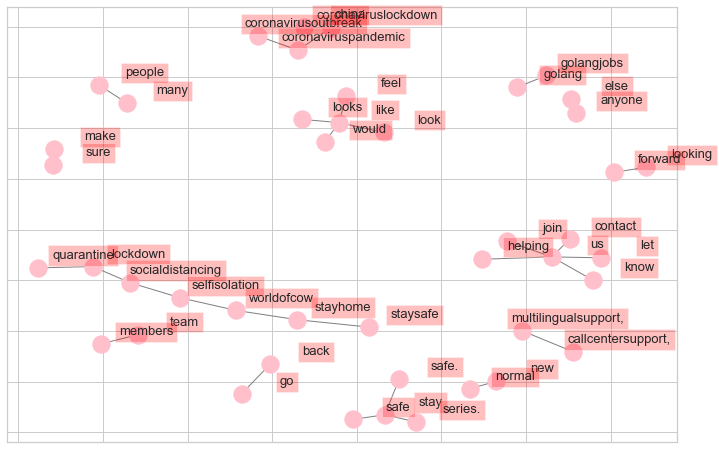

In [116]:
fig, ax = plt.subplots(figsize=(12, 8))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=7,
                 width=1,
                 edge_color='grey',
                 node_color='pink',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

## Analyze Sentiments in Tweets